In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img2=cv2.imread('./test_image/smriti.jpg')
img2.shape

(1067, 720, 3)

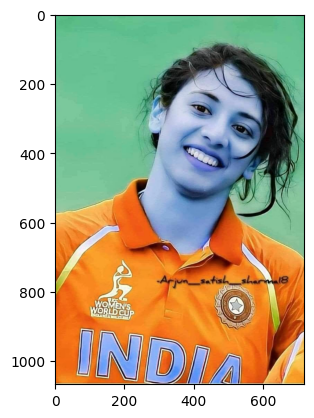

In [5]:
plt.imshow(img2)

In [6]:
img=cv2.imread('./test_image/smriti2.jpg')
img.shape

(2560, 1438, 3)

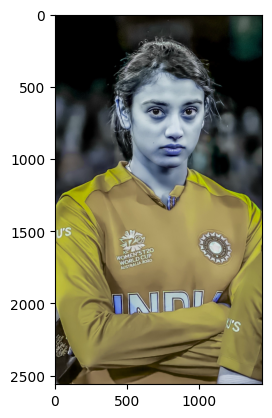

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(2560, 1438)

In [9]:
gray

array([[  0,   0,   0, ...,  17,  14,  13],
       [  0,   0,   0, ...,  23,  21,  21],
       [  0,   0,   0, ...,  24,  24,  24],
       ...,
       [121, 124, 127, ..., 104, 102, 101],
       [114, 117, 120, ..., 104, 101,  99],
       [107, 111, 115, ..., 103,  99,  96]],
      shape=(2560, 1438), dtype=uint8)

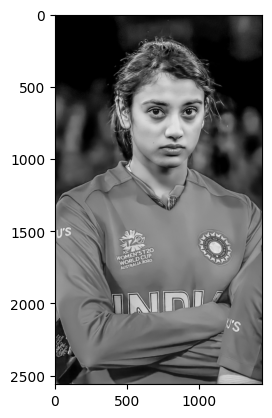

In [10]:
plt.imshow(gray,cmap='gray')

In [11]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[475, 391, 724, 724]], dtype=int32)

In [12]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(475), np.int32(391), np.int32(724), np.int32(724))

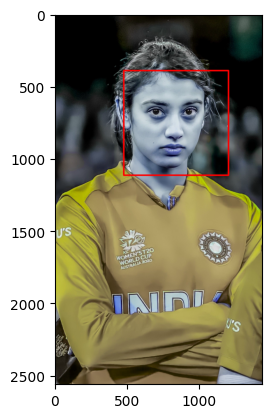

In [13]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),10)
plt.imshow(face_img)

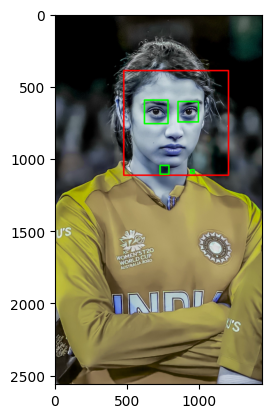

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

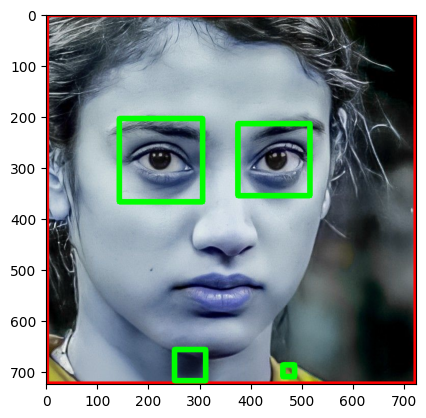

In [15]:
plt.imshow(roi_color)

In [16]:

def get_cropped_image_if_2_eyes(image_path):
                # Ignore non-image files
    if not image_path.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"Skipping non-image file: {image_path}")
        return None 
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error reading image: {image_path}")
        return None  # Skip unreadable images 
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

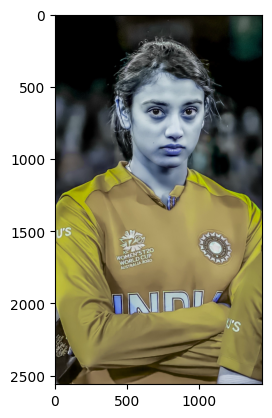

In [17]:
original_image = cv2.imread('./test_image/smriti2.jpg')
plt.imshow(original_image)

In [18]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)

        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1 


    

cropped
hardik_pandya
Generating cropped images in folder:  ./dataset/cropped/hardik_pandya
ms_dhoni
Generating cropped images in folder:  ./dataset/cropped/ms_dhoni
Skipping non-image file: ./dataset/ms_dhoni\c_url=https_3A_2F_2Fd2gjl3w70qc898.cloudfront.net_2Fcontent_2Fuploads_2F2021_2F10_2F19162931_2FMS-Dhoni.webp
Skipping non-image file: ./dataset/ms_dhoni\MS-Dhoni.webp
rohit_sharma
Generating cropped images in folder:  ./dataset/cropped/rohit_sharma
sachin_tendulkar
Generating cropped images in folder:  ./dataset/cropped/sachin_tendulkar
Skipping non-image file: ./dataset/sachin_tendulkar\Sachin-Tendulkar.avif
smriti_mandhana
Generating cropped images in folder:  ./dataset/cropped/smriti_mandhana
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli
Skipping non-image file: ./dataset/virat_kohli\08vk.gif


In [22]:
import os
import cv2

path = './dataset/cropped/'

for entry in os.scandir(path):
    if entry.is_dir():  # Ensure it's a directory
        count = 1
        celebrity_name = os.path.basename(entry.path)  # Extract folder name
        cropped_folder = entry.path  # Folder where images will be saved

        for img_file in os.scandir(entry.path):  # Iterate over images
            img_path = img_file.path
            img = cv2.imread(img_path)

            if img is None:
                print(f"Skipping unreadable file: {img_path}")
                continue

            cropped_file_name = f"{celebrity_name}{count}.png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)

            cv2.imwrite(cropped_file_path, img)  # Save the image
            

            count += 1  # Increment count


In [23]:
cropped_img = np.array(roi_color)
cropped_img.shape

(133, 133, 3)

In [24]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

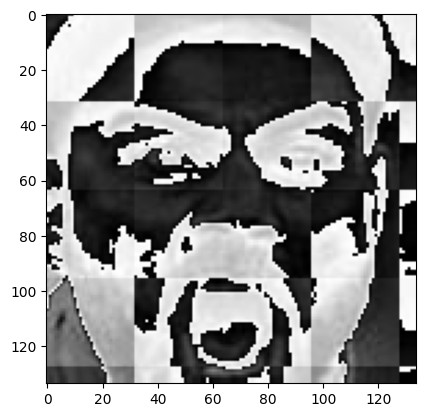

In [25]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [26]:
celebrity_file_names_dict 

{'cropped': [],
 'hardik_pandya': ['./dataset/cropped/hardik_pandya/hardik_pandya1.png',
  './dataset/cropped/hardik_pandya/hardik_pandya2.png',
  './dataset/cropped/hardik_pandya/hardik_pandya3.png',
  './dataset/cropped/hardik_pandya/hardik_pandya4.png',
  './dataset/cropped/hardik_pandya/hardik_pandya5.png',
  './dataset/cropped/hardik_pandya/hardik_pandya6.png',
  './dataset/cropped/hardik_pandya/hardik_pandya7.png',
  './dataset/cropped/hardik_pandya/hardik_pandya8.png',
  './dataset/cropped/hardik_pandya/hardik_pandya9.png',
  './dataset/cropped/hardik_pandya/hardik_pandya10.png',
  './dataset/cropped/hardik_pandya/hardik_pandya11.png',
  './dataset/cropped/hardik_pandya/hardik_pandya12.png',
  './dataset/cropped/hardik_pandya/hardik_pandya13.png',
  './dataset/cropped/hardik_pandya/hardik_pandya14.png',
  './dataset/cropped/hardik_pandya/hardik_pandya15.png',
  './dataset/cropped/hardik_pandya/hardik_pandya16.png',
  './dataset/cropped/hardik_pandya/hardik_pandya17.png',
  './da

In [27]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'hardik_pandya': 1,
 'ms_dhoni': 2,
 'rohit_sharma': 3,
 'sachin_tendulkar': 4,
 'smriti_mandhana': 5,
 'virat_kohli': 6}

In [28]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [29]:
len(X[0])

4096

In [30]:
32*32*3 + 32*32
32*32*3 + 32*32

4096

In [31]:
X[0]

array([[ 23],
       [ 37],
       [ 42],
       ...,
       [ 29],
       [ 82],
       [138]], shape=(4096, 1), dtype=uint8)

In [32]:
y[0]

1

In [34]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(390, 4096)

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.1)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8717948717948718

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.60      0.86      0.71         7
           3       1.00      1.00      1.00         5
           4       0.67      0.33      0.44         6
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        11

    accuracy                           0.87        39
   macro avg       0.88      0.87      0.86        39
weighted avg       0.88      0.87      0.86        39



In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\PRASANGI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PRASANGI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PRASANGI\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\PRASANGI\AppData\Local\Progr

,model,best_score,best_params
0,svm,0.811911,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.683823,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.837545,{'logisticregression__C': 1}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, multi_class='auto',
                                     solver='liblinear'))])}

In [49]:
best_estimators['svm'].score(X_test,y_test)

0.8974358974358975

In [50]:
best_estimators['random_forest'].score(X_test,y_test)

0.717948717948718

In [51]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8974358974358975

In [52]:
best_clf = best_estimators['svm']

In [53]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 2,  0,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  3,  0,  3,  0,  0],
       [ 0,  0,  0,  1,  7,  0],
       [ 0,  0,  0,  0,  0, 11]])

Text(95.72222222222221, 0.5, 'Truth')

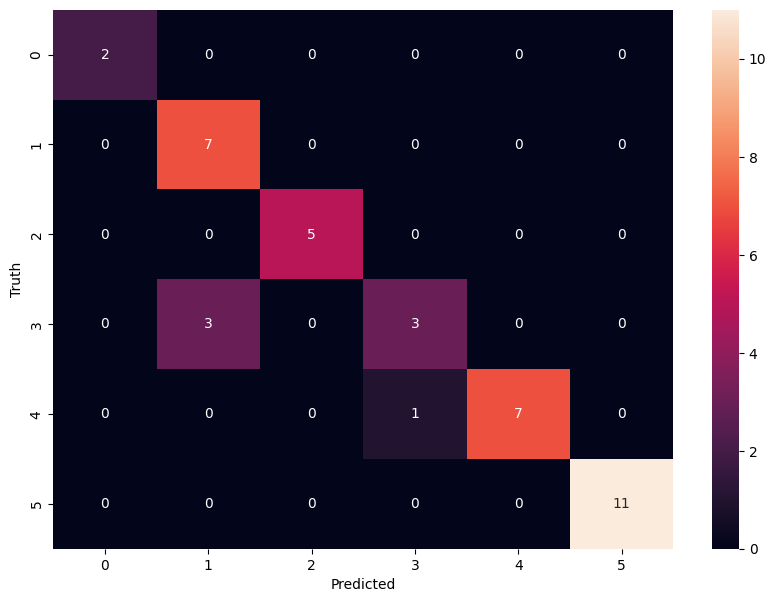

In [54]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
class_dict

{'cropped': 0,
 'hardik_pandya': 1,
 'ms_dhoni': 2,
 'rohit_sharma': 3,
 'sachin_tendulkar': 4,
 'smriti_mandhana': 5,
 'virat_kohli': 6}

In [56]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['saved_model.pkl']

In [57]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))